# 🔵 Inputs

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import numpy as np
import seaborn as sns
import subprocess
from sklearn.preprocessing import MinMaxScaler
from IPython.display import SVG
from scipy.optimize import curve_fit

results = "results.csv"
cleaned_results = "cleaned_results.csv"


plt.rcParams['text.usetex'] = True
sns.set()

In [2]:
# Real Function
def func(x):
    a=10
    b=-0.5
    c=-0.5
    d=2
    return a*np.exp(b*np.exp(c*x + d))

def plt_svg(svg_path):
    subprocess.run(["convert", svg_path + ".svg", svg_path + ".png"], shell=True)
    return plt.imread(svg_path + ".png")

def least_squares_fit(function, X, y, guess, method=None):
    params, covariance = curve_fit(function, X, y, guess, method=method, maxfev=1000000)
    return params

def least_squares(X, y_real, func, *params):
    if params:
        y_pred = func(X, *params)
    else:
        y_pred = func(X)
    return np.sum( (y_real - y_pred)**2)/len(y_real)

## 🔷 O Problema
O fitness score é calculado como o erro médio quadrático.
- Nesse caso não temos erro

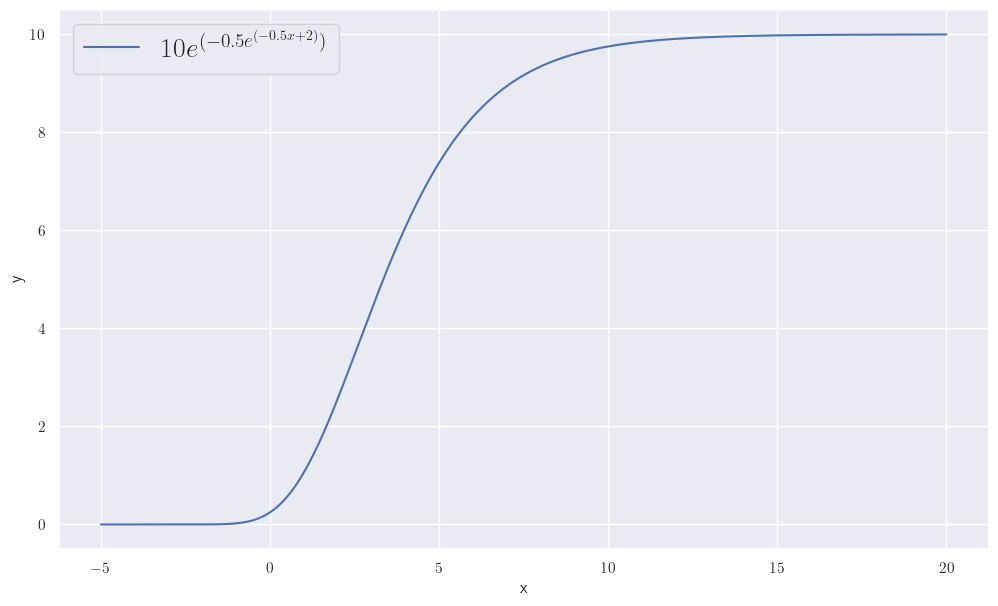

In [3]:
plt.figure(figsize=(12,7))
X = np.linspace(-5, 20, 1000)
y = func(X)
sns.lineplot(x=X, y=y, label="$10e^{(-0.5e^{(-0.5x+2)})}$")
plt.ylabel("y"); plt.xlabel("x")
plt.legend(fontsize=20)
plt.show()

# Adjusting Data

In [4]:
dirs = ["output", "output_const_range", "output_generations", "output_inten_scaled", "output_intensified", "output_scaled",
       "output_expr_size/test1", "output_expr_size/test2", "output_expr_size/test3"]

for d in dirs:
    data = pd.read_csv(d + "/" + results)
    colum = []
    for col in data.columns:
        colum.append(col.strip())
    data.columns = colum
    data.training_time = data.training_time/60
    data.to_csv(d + "/" + cleaned_results, index=False)

# 🔵 1. Output
Caso base. Equação
$$10*\exp(-0.5*exp(-0.5*x + 2))$$
- 🔴 X range: (0, 15)

- Max generations = 3
- max_expression_size: 3
- max_island_count: population/10

- 🔴 Not Normalized
- 🔴 Constants range from 0 to 1

In [5]:
path = "output/"

data = pd.read_csv(path + cleaned_results)

In [6]:
X = np.linspace(0, 15, 1000)
y = func(X)

## Fitness X Population Size

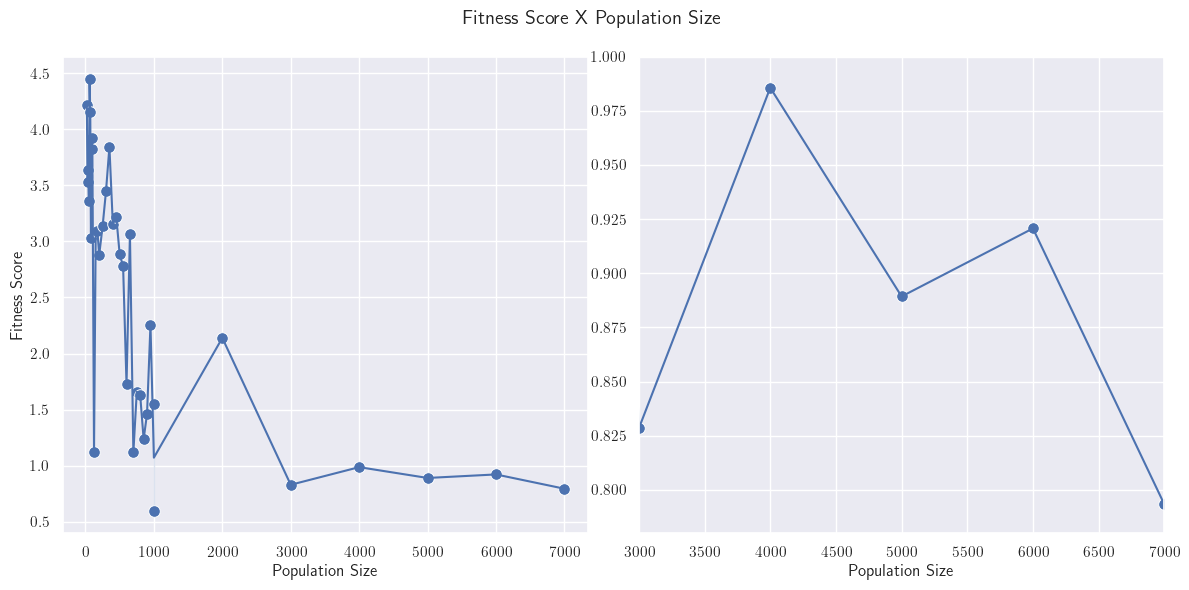

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle("Fitness Score X Population Size")


sns.lineplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0]) 
sns.scatterplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0], s=70)
plt.tight_layout()

for ax in axs:
    ax.set_xlabel("Population Size")
    ax.set_ylabel("Fitness Score")
    
axs[1].set_xlim((3000, 7000))
axs[1].set_ylim((0.78, 1))
axs[1].set_ylabel(" ", visible=False)


sns.lineplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1])
sns.scatterplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1], s=70)
plt.show()

## Training Time X Population Size

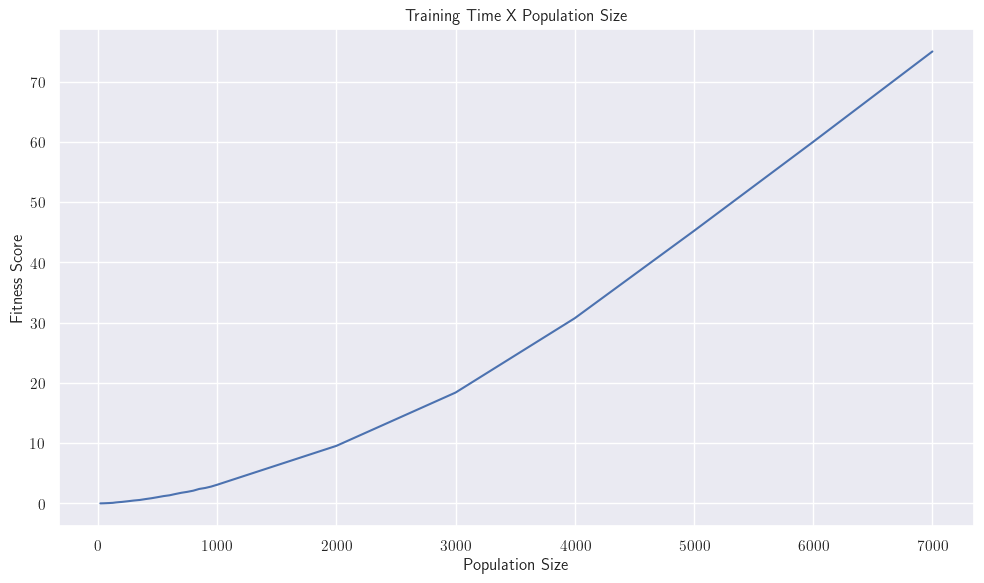

In [8]:
plt.figure(figsize=(10, 6))
plt.title("Training Time X Population Size ")

sns.lineplot(data, x=data.population_size, y=data["training_time"]) 
plt.tight_layout()

plt.xlabel("Population Size")
plt.ylabel("Fitness Score")

plt.show()

## Best Fit

In [9]:
best_tree = data.sort_values("fitness_score", axis=0)
best_tree = best_tree.reset_index(drop=True)
best_index = str(best_tree.population_size[0])

img_path = path + "trees/tree-" + best_index

best_data = pd.read_csv(path + f"data/data-{best_index}.csv")

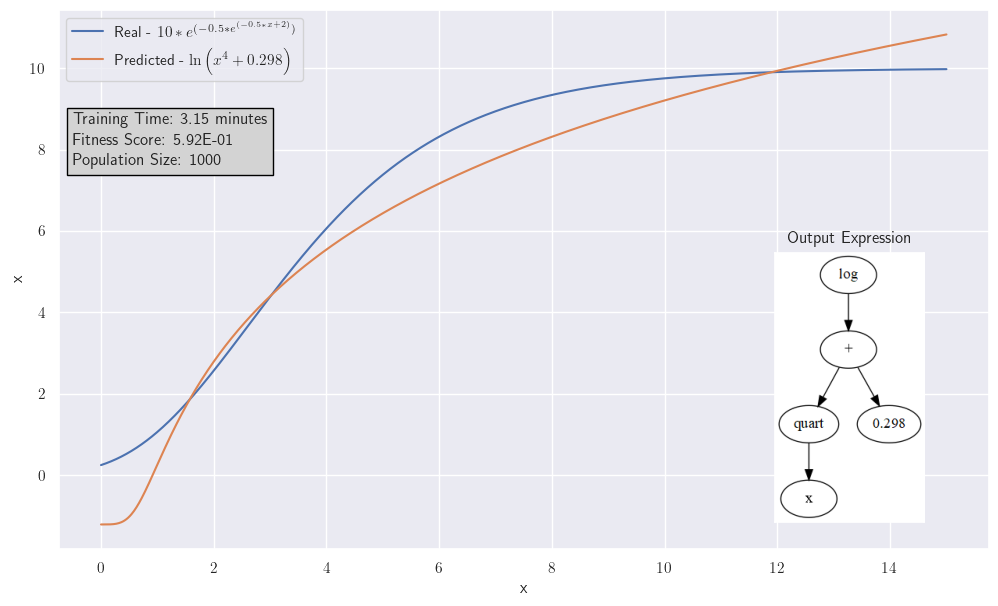

In [10]:
# fig, axs = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

plt.figure(figsize=(12, 7))
plt.tight_layout()

sns.lineplot(x=best_data.x, y=func(best_data.x), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$")
sns.lineplot(x=best_data.x, y=best_data.y, label=r"Predicted - $\ln\Big(x^4 + 0.298\Big)$")

plt.annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Fitness Score: {best_tree.fitness_score[0]:.2E}
Population Size: {best_index}""", 
            (-0.5, 7.6), bbox={"facecolor": "lightgray", "edgecolor": "black"},
            linespacing = 1.5)

img = plt_svg(img_path)
ins = plt.gca().inset_axes([0.6, 0.05, 0.5, 0.5])
ins.imshow(img)
ins.get_xaxis().set_visible(False)
ins.get_yaxis().set_visible(False)
ins.set_title(f"Output Expression")

plt.show()

## Lest Squares Fit

In [11]:
def model(X, a):
    return np.log(X**4 + a)

def model_over(X, a, b, c, d, e):
    return a*np.log((b*X + c)**4 + d) + e

params = least_squares_fit(model, X, y, [1])
params_over = least_squares_fit(model_over, X, y, [1, 1, 1, 1, 1])
print(f"params: {params}")
print(f"params over: {params_over}")

params: [1.57443367]
params over: [ 0.82158442  1.17057505 -0.80956622  0.27974877  1.67056586]


C:\Users\lreis\AppData\Local\Temp\ipykernel_9592\3756440565.py:5: RuntimeWarning: invalid value encountered in log
  return a*np.log((b*X + c)**4 + d) + e


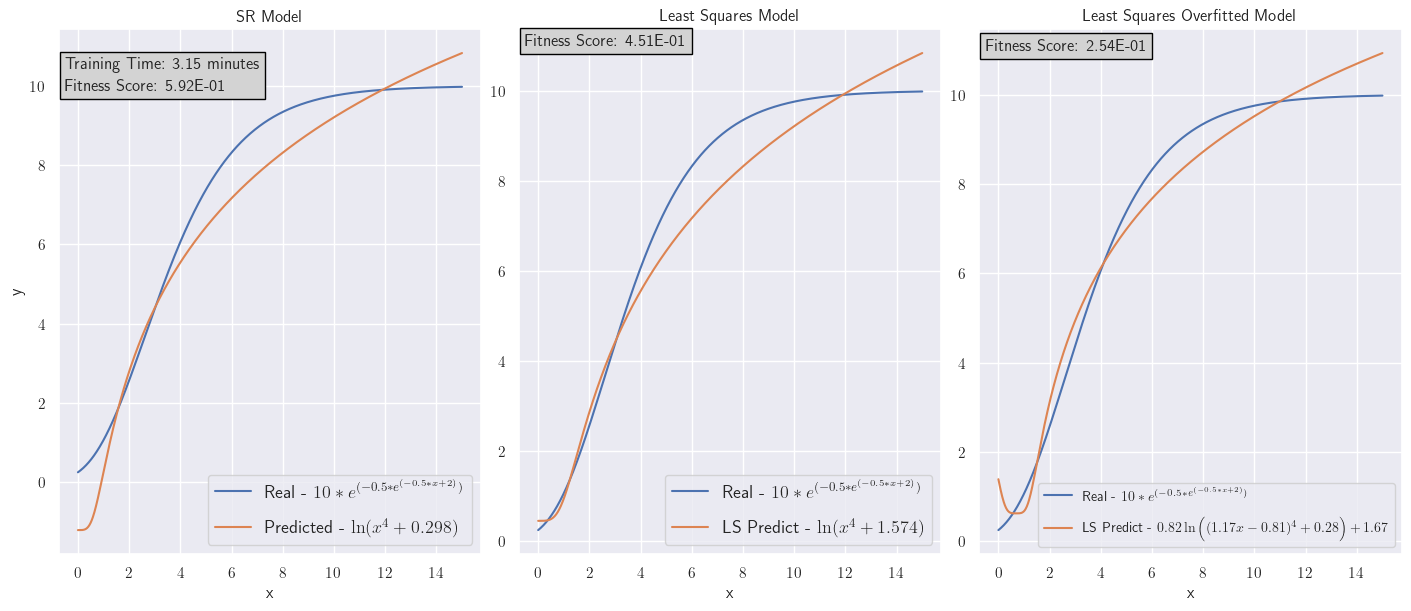

In [13]:
fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(14, 6))

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0])
sns.lineplot(x=X, y=best_data.y, label=r"Predicted - $\ln(x^4 + 0.298)$", ax=axs[0])


# Axis 1
axs[0].annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Fitness Score: {best_tree.fitness_score[0]:.2E}""", 
            (-0.5, 9.9), bbox={"facecolor": "lightgray", "edgecolor": "black"},
               linespacing = 1.5) 

axs[0].legend(prop={"size": 13}, labelspacing=1)
axs[0].set_ylabel("y")
axs[0].set_xlabel("x")
axs[0].set_title("SR Model")


# Axis 2
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1])
sns.lineplot(x=X, y=model(X, *params), ax=axs[1], label=r"LS Predict - $\ln(x^4 + 1.574)$")
axs[1].legend(prop={"size": 13}, labelspacing=1)
axs[1].set_xlabel("x")

axs[1].annotate(f"""Fitness Score: {least_squares(X, y, model, *params):.2E}""", 
            (-0.5, 11), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1].set_title("Least Squares Model")


# Axis 3
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[2])
sns.lineplot(x=X, y=model_over(X, *params_over), ax=axs[2], label=r"LS Predict - $0.82\ln\Big((1.17x - 0.81)^4 + 0.28\Big) + 1.67$")
axs[2].legend(prop={"size": 10}, labelspacing=1, loc="lower right")
axs[2].set_xlabel("x")

axs[2].annotate(f"""Fitness Score: {least_squares(X, y, model_over, *params_over):.2E}""", 
            (-0.5, 11), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[2].set_title("Least Squares Overfitted Model")


plt.show()

## 🔷 Conclusões
- Péssima aproximação, erro está muito alto
- Não encontrou a função real
- Complexidade exponencial
- Um comportamento observado em todos os casos é que o modelo atinge um estado de equilíbrio com um número maior de população. Mesmo que tenhamos observados resultados melhores, e mais consistentes, quando maior o número de iterações.

A solução com população = 1000 é um outlier, dentro desse valor de população. Entretanto, população = 7000 também atingiu-se esse resultado (apesar de constantes).

# 🔵 Output Scaled

Equation
$$10*\exp(-0.5*exp(-0.5*x + 2))$$
- X range: (0, 15)

- Max generations = 3
- max_expression_size: 3
- max_island_count: population/10

- 🔴 Normalized input (range from 0 to 1)
- Constants range from 0 to 1

## Reverse Transform
$$x' = \frac{x - \min(x)}{\max(x) - \min(x)} \hspace{20mm} y'(x') = \frac{y(x) - \min(y(x))}{\max(y(x)) - \min(y(x))}$$

$$x = \Big(\max(x) - \min(x)\Big)x' + \min(x) \hspace{20mm} y(x) = \Big(\max(y(x)) - \min(y(x))\Big)y'(x') + \min(y(x))$$

The reverse transform outputed by the SR algorithm is
$$y(x) = \Big(\max(y(x)) - \min(y(x))\Big)y'\left(\frac{x - \min(x)}{\max(x) - \min(x)}\right) + \min(y(x))$$
Where:
- $y'$: Is the scaled function (outputed by the SR algorithm for a scaled input)

In [ ]:
path = "output_scaled/"
img_path = path + "trees/"
data_path = path + "data/"

data = pd.read_csv(path + cleaned_results)

## Fitness X Population Size
Diminuição **aparente** no valor do erro

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)
plt.suptitle("Fitness Score X Population Size (Normalized Input)")


sns.lineplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0]) 
sns.scatterplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0], s=70)


for ax in axs:
    ax.set_xlabel("Population Size")
    ax.set_ylabel("Fitness Score")
    
axs[1].set_xlim((1000, 7000))
axs[1].set_ylim((0.0020, 0.0040))
axs[1].set_ylabel(" ", visible=False)


sns.lineplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1])
sns.scatterplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1], s=70)
plt.show()

## Training Time X Population Size

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Training Time X Population Size ")

sns.lineplot(data, x=data.population_size, y=data["training_time"]) 
plt.tight_layout()

plt.xlabel("Population Size")
plt.ylabel("Training Time")

plt.show()

## Best Fit
Como os dados foram normalizados, o valor bruto do erro diminuí, simplesmentes pelos valores brutos serem menores. Concertamos esse erro para a escala real

In [ ]:
best_tree = data.sort_values("fitness_score", axis=0)
best_tree = best_tree.reset_index(drop=True)
best_index = str(best_tree.population_size[0])

img_path = path + "trees/tree-" + best_index

best_data = pd.read_csv(path + f"data/data-{best_index}.csv")
display(SVG(img_path + ".svg"))

In [ ]:
X = np.linspace(0, 15, 1000)
y = func(X)

X_range = X.max() - X.min()
y_range = y.max() - y.min()

def output_func(X):
    return np.tanh((X - X.min())/(0.375 * X_range))*y_range + y.min()

In [ ]:
plt.figure(figsize=(11, 7))
plt.tight_layout()

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$")
sns.lineplot(x=X, y=output_func(X), label=r"Predicted - $9.73\tanh\Big(0.18x\Big) + 0.249$")

plt.annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}
Population Size: {best_index}""", 
            (-0.5, 7.1), bbox={"facecolor": "lightgray", "edgecolor": "black"},
            linespacing = 1.5)


img = plt_svg(img_path)
ins = plt.gca().inset_axes([0.6, 0.05, 0.5, 0.5])
ins.imshow(img)
ins.get_xaxis().set_visible(False)
ins.get_yaxis().set_visible(False)
ins.set_title(f"Normalized Output Expression")

plt.ylabel("y")
plt.xlabel("x")

plt.legend(prop={"size": 13}, labelspacing=1, loc="upper left")
plt.show()

## Lest Squares Fit

In [ ]:
def model(X, a):
    return 9.73*np.tanh(a*X) + 0.249

def model_norm(X, a, b, c):
    return a*np.tanh(b*X) + c

def model_over(X, a, b, c, d):
    return a * np.tanh(b*X + c) + d

params = least_squares_fit(model, X, y, [1])
params_norm = least_squares_fit(model_norm, X, y, [1, 1, 1])
params_over = least_squares_fit(model_over, X, y, [1, 1, 1, 1])
print(f"params: {params}")
print(f"params norm: {params_norm}")
print(f"params over: {params_over}")

In [ ]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(14, 12))

plt.suptitle(r"\textbf{Comparison between the original model and different levels of leas squares fitting}", fontsize=16)

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0, 0])
sns.lineplot(x=X, y=output_func(X), label=r"Predicted - $9.73\tanh\Big(\mathbf{0.18}x\Big) + 0.249$", ax=axs[0, 0])


# Axis 1
axs[0, 0].annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}""", 
            (-0.5, 9.2), bbox={"facecolor": "lightgray", "edgecolor": "black"},
               linespacing = 1.5)

axs[0, 0].legend(prop={"size": 13}, labelspacing=1)
axs[0, 0].set_ylabel("y")
axs[0, 0].set_xlabel("x")
axs[0, 0].set_title("SR Model")


# Axis 2
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0, 1])
sns.lineplot(x=X, y=model(X, *params), ax=axs[0, 1], label=r"LS Predict - $9.73\tanh\Big(0.18x\Big) + 0.249$")
axs[0, 1].legend(prop={"size": 13}, labelspacing=1)
axs[0, 1].set_xlabel("x")

axs[0, 1].annotate(f"""Fitness Score: {least_squares(X, y, model, *params):.2E}""", 
            (-0.5, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[0, 1].set_title("Least Squares Model")


# Axis 3
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1, 0])
sns.lineplot(x=X, y=model_norm(X, *params_norm), ax=axs[1, 0], label=r"LS Predict - $\mathbf{11.13}\tanh\Big(\mathbf{0.18}x\Big) + \mathbf{-0.86}$")
axs[1, 0].legend(prop={"size": 13}, labelspacing=1)
axs[1, 0].set_xlabel("x")

axs[1, 0].annotate(f"""Fitness Score: {least_squares(X, y, model_norm, *params_norm):.2E}""", 
            (-0.5, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1, 0].set_title("Least Squares From Normalized Model")


# Axis 4
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1, 1])
sns.lineplot(x=X, y=model_over(X, *params_over), ax=axs[1, 1], label=r"LS Predict - $\mathbf{5.94}\tanh\Big(\mathbf{0.29}x \mathbf{- 0.81}\Big) + \mathbf{4}$")
axs[1, 1].legend(prop={"size": 13}, labelspacing=1)
axs[1, 1].set_xlabel("x")

axs[1, 1].annotate(f"""Fitness Score: {least_squares(X, y, model_over, *params_over):.2E}""", 
            (-0.5, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1, 1].set_title("Least Squares Overfitted Model")



plt.show()

## 🔷 Conclusões
- Erro do método continua no ordem de $10^{-1}$
- A complexidade não muda
- Um modelo, para a mesma função, porém com as constantes ajustadas chegou a um erro da ordem de $10^{-3}$
- Até então o modelo estava limitado pelo intervalo das constantes, o que poderia não dar a ele completa liberdade.

Escolhi fazer os testes de mínimo quadrado para a mesma função que o modelo descobriu, pois descobrir a função é o intuíto do algoritmo e, obviamente, se fornecermos a função correta o algoritmo de mínimo quadrados será mais eficiente em encontrar a solução. 

# 🔵 Output Changing Constants Range

Equation
$$10*\exp(-0.5*exp(-0.5*x + 2))$$
- X range: (0, 15)

- Max generations = 3
- max_expression_size: 3
- max_island_count: population/10

- 🔴 Normalized input (range from 0 to 1)
- 🔴 Constants range from -10 to 10

In [ ]:
path = "output_const_range/"
img_path = path + "trees/"
data_path = path + "data/"

data = pd.read_csv(path + cleaned_results)

## Fitness X Population Size

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)
plt.suptitle("Fitness Score X Population Size (Changed Constants Range)")


sns.lineplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0])
sns.scatterplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0], s=70)


for ax in axs:
    ax.set_xlabel("Population Size")
    ax.set_ylabel("Fitness Score")
    
axs[1].set_xlim((1000, 7000))
axs[1].set_ylim((0, 0.0040))
axs[1].set_ylabel(" ", visible=False)


sns.lineplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1])
sns.scatterplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1], s=70)
plt.show()

## Training Time X Population Size

In [ ]:
no_outlier_data = data.drop(32, axis=0)

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Training Time X Population Size ")

sns.lineplot(data, x=data.population_size, y=data["training_time"]) 

ins = plt.gca().inset_axes([0.1, 0.5, 0.35, 0.35])
ins.set_facecolor("white")
ins.set_ylabel(" ", visible=False)
ins.set_xlabel(" ", visible=False)
ins.set_title("Removing Outlier")

sns.set_style("white")
sns.lineplot(data, x=no_outlier_data.population_size, y=no_outlier_data["training_time"], ax=ins) 
sns.set()
plt.tight_layout()

plt.xlabel("Population Size")
plt.ylabel("Training Time")

plt.show()

## Best Fit
É a primeira vez que abaixamos uma ordem do erro real

In [ ]:
best_tree = data.sort_values("fitness_score", axis=0)
best_tree = best_tree.reset_index(drop=True)
best_index = str(best_tree.population_size[0])

img_path = path + "trees/tree-" + best_index

best_data = pd.read_csv(path + f"data/data-{best_index}.csv")
SVG(img_path + ".svg")

In [ ]:
X = np.linspace(0, 15, 1000)
y = func(X)

X_range = X.max() - X.min()
y_range = y.max() - y.min()

def output_func(X):
    # return (np.tanh(3.762*X))**2
    return (np.tanh(3.762*(X - X.min())/(X_range)))**2 * y_range + y.min()

In [ ]:
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(11, 7))
plt.tight_layout()

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$")
sns.lineplot(x=X, y=output_func(X), label=r"Predicted - $9.73\left(\tanh\left(0.25x\right)\right)^2 + 0.249$")

plt.annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}
Population Size: {best_index}""", 
            (-0.5, 7.1), bbox={"facecolor": "lightgray", "edgecolor": "black"},
            linespacing = 1.5)

img = plt_svg(img_path)
ins = plt.gca().inset_axes([0.5, 0.2, 0.5, 0.5])
ins.imshow(img)
ins.get_xaxis().set_visible(False)
ins.get_yaxis().set_visible(False)
ins.set_title(f"Normalized Output Expression")


plt.ylabel("y")
plt.xlabel("x")

plt.legend(prop={"size": 13}, labelspacing=1, loc="upper left")
plt.show()

## Lest Squares Fit

In [ ]:
def model(X, a, b, c, d, e, f):
    return a*(b * np.tanh(c*X + d) + e)**2 + f

params = least_squares_fit(model, X, y, [1, 1, 1, 1, 1, 1])
params

In [ ]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 6))

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0])
sns.lineplot(x=X, y=output_func(X), label=r"Predicted - $9.73\tanh\Big(0.18x\Big) + 0.249$", ax=axs[0])


# Axis 1
axs[0].annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}""", 
            (-0.5, 9.2), bbox={"facecolor": "lightgray", "edgecolor": "black"},
               linespacing = 1.5)

axs[0].legend(prop={"size": 10}, labelspacing=1)
axs[0].set_ylabel("y")
axs[0].set_xlabel("x")
axs[0].set_title("SR Model")


# Axis 2
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1])
sns.lineplot(x=X, y=model(X, *params), ax=axs[1], label=r"LS Predict - $1.38\left(2.28 \tanh\Big(0.25x -0.07\Big) + 0.38\right)^2 + 0.22$")
axs[1].legend(prop={"size": 10}, labelspacing=1)
axs[1].set_xlabel("x")

axs[1].annotate(f"""Fitness Score: {least_squares(X, y, model, *params):.2E}""", 
            (-0.5, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1].set_title("Least Squares Model")

ins = axs[1].inset_axes([0.55, 0.35, 0.35, 0.35])
sns.lineplot(x=X, y=func(X), ax=ins)
sns.lineplot(x=X, y=model(X, *params), ax=ins)
ins.set_xlim((3.95,4.05))
ins.set_ylim((6,6.15))

plt.show()

## 🔷 Conclusões
- O erro, pela primeira vez, chegou a ordem de $10^{-2}$
- O erro com as constantes ajustadas chegou a ordem de $10^{-5}$
- Apesar do outlier no tempo de execução, ele se manteve com complexidde exponencial
- Observamos que a solução original incluí uma constate fora do intervalo anterior de (0,1). Ou seja, esse também é um hiperparâmetro muito importante a ser considerado

Até então utilizamos um intervalo de (0, 15) para os dados de entrada, porém, isso limita as informações para o modelo, além de que ele não é capaz de reproduzir o comportamento dessa parte da função. Por isso, vamos expandir o intervalo dos dados.

# 🔵 Output Intensified
Nos casos "intensificados", aumentamos o intervalo dos dados, afim de mostrar melhor o comportamento da função.

Equation
$$10*\exp(-0.5*exp(-0.5*x + 2))$$
- 🔴 X range: (-5, 15)

- Max generations = 3
- max_expression_size: 3
- max_island_count: population/10

- 🔴 Non Normalized input
- 🔴 Constants range from -10 to 10

In [ ]:
path = "output_intensified/"
img_path = path + "trees/"
data_path = path + "data/"

data = pd.read_csv(path + cleaned_results)

## Fitness X Population Size
Os resultados para o intervalo "intensificado" e não normalizado foram horríveis

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)
plt.suptitle("Fitness Score X Population Size (Intensified)")


sns.lineplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0]) 
sns.scatterplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0], s=70)


for ax in axs:
    ax.set_xlabel("Population Size")
    ax.set_ylabel("Fitness Score")
    
axs[1].set_xlim((1000, 7000))
axs[1].set_ylim((1.8, 3.5))
axs[1].set_ylabel(" ", visible=False)


sns.lineplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1])
sns.scatterplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1], s=70)
plt.show()

## Training Time X Population Size

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Training Time X Population Size ")

sns.lineplot(data, x=data.population_size, y=data["training_time"]) 

sns.set_style("white")
sns.lineplot(data, x=data.population_size, y=data["training_time"], ax=ins) 
sns.set()
plt.tight_layout()

plt.xlabel("Population Size")
plt.ylabel("Training Time")

plt.show()

## Best Fit

In [ ]:
best_tree = data.sort_values("fitness_score", axis=0)
best_tree = best_tree.reset_index(drop=True)
best_index = str(best_tree.population_size[0])

img_path = path + "trees/tree-" + best_index

best_data = pd.read_csv(path + f"data/data-{best_index}.csv")
SVG(img_path + ".svg")

In [ ]:
X = best_data.x
y = func(X)

In [ ]:
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(11, 7))
plt.tight_layout()

sns.lineplot(x=best_data.x, y=func(best_data.x), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$")
sns.lineplot(x=best_data.x, y=best_data.y, label=r"Predicted - $x+-0.664(2.699 + x)$")

plt.annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}
Population Size: {best_index}""", 
            (-5.48, 8.5), bbox={"facecolor": "lightgray", "edgecolor": "black"},
            linespacing = 1.5)

img = plt_svg(img_path)
ins = plt.gca().inset_axes([0.55, 0.05, 0.5, 0.5])
ins.imshow(img)
ins.get_xaxis().set_visible(False)
ins.get_yaxis().set_visible(False)
ins.set_title(f"Output Expression")


plt.ylabel("y")
plt.xlabel("x")

plt.legend(prop={"size": 13}, labelspacing=1, loc="upper left")
plt.show()

## Lest Squares Fit

In [ ]:
def model(X, a, b):
    return a * X + b

params = least_squares_fit(model, X, y, [1, 1])
params

In [ ]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 6))

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0])
sns.lineplot(x=X, y=best_data.y, label=r"Predicted - $x+-0.664(2.699 + x)$", ax=axs[0])


# Axis 1
axs[0].annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}""", 
            (-5.5, 9.2), bbox={"facecolor": "lightgray", "edgecolor": "black"},
               linespacing = 1.5)

axs[0].legend(prop={"size": 10}, labelspacing=1)
axs[0].set_ylabel("y")
axs[0].set_xlabel("x")
axs[0].set_title("SR Model")


# Axis 2
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1])
sns.lineplot(x=X, y=model(X, *params), ax=axs[1], label=r"LS Predict - $0.69x + 2.17$")
axs[1].legend(prop={"size": 10}, labelspacing=1)
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")

axs[1].annotate(f"""Fitness Score: {least_squares(X, y, model, *params):.2E}""", 
            (-5.5, 10.8), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1].set_title("Least Squares Model")

plt.show()

## 🔷 Conclusões
- O algoritmo não convergiu e não conseguiu encontrar uma solução que descreva a curva

Isso implica que, dependendo do intervalo de dados fornecidos, o algoritmo pode ter uma maior dificuldade de encontrar qualquer solução. 

# Output Normalized Intensified 

Equation
$$10*\exp(-0.5*exp(-0.5*x + 2))$$
- 🔴 X range: (-5, 15)

- Max generations = 3
- max_expression_size: 3
- max_island_count: population/10

- 🔴 Normalized input (range from 0 to 1)
- 🔴 Constants range from -10 to 10

In [ ]:
path = "output_inten_scaled/"
img_path = path + "trees/"
data_path = path + "data/"

data = pd.read_csv(path + cleaned_results)

## Fitness X Population Size

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)
plt.suptitle("Fitness Score X Population Size (Normalized and Intensified)")


sns.lineplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0]) 
sns.scatterplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0], s=70)

for ax in axs:
    ax.set_xlabel("Population Size")
    ax.set_ylabel("Fitness Score")
    
axs[1].set_xlim(3000, 7000)
axs[1].set_ylim((0, 0.0050))
axs[1].set_ylabel(" ", visible=False)


sns.lineplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1])
sns.scatterplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1], s=70)
plt.show()

## Training Time X Population Size

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Training Time X Population Size ")

sns.lineplot(data, x=data.population_size, y=data["training_time"]) 

sns.set_style("white")
sns.lineplot(data, x=data.population_size, y=data["training_time"], ax=ins) 
sns.set()
plt.tight_layout()

plt.xlabel("Population Size")
plt.ylabel("Training Time")

plt.show()

## Best Fit

In [ ]:
best_tree = data.sort_values("fitness_score", axis=0)
best_tree = best_tree.reset_index(drop=True)
best_index = str(best_tree.population_size[0])

img_path = path + "trees/tree-" + best_index

best_data = pd.read_csv(path + f"data/data-{best_index}.csv")
SVG(img_path + ".svg")

In [ ]:
X = np.linspace(-5, 15, 1000)
y = func(X)

X_range = X.max() - X.min()
y_range = y.max() - y.min()

def output_func(X):
    # return (np.tanh(3.762*(X - X.min())/(X_range)))**2 * y_range + y.min()
    return np.exp((np.log( (X - X.min())/X_range ))**3) * y_range + y.min()

$$9.98\exp\left(\ln^3\left(0.05x + 0.25\right)\right)$$

In [ ]:
plt.figure(figsize=(11, 7))
plt.tight_layout()

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$")
sns.lineplot(x=X, y=output_func(X), label=r"Predicted - $9.98\exp\left(\ln^3\left(0.05x + 0.25\right)\right)$")

plt.annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}
Population Size: {best_index}""", 
            (-5.6, 7.1), bbox={"facecolor": "lightgray", "edgecolor": "black"},
            linespacing = 1.5)

img = plt_svg(img_path)
ins = plt.gca().inset_axes([0.5, 0.2, 0.5, 0.5])
ins.imshow(img)
ins.get_xaxis().set_visible(False)
ins.get_yaxis().set_visible(False)
ins.set_title(f"Normalized Output Expression")


plt.ylabel("y")
plt.xlabel("x")

plt.legend(prop={"size": 13}, labelspacing=1, loc="upper left")
plt.show()

## Lest Squares Fit

In [ ]:
def model(X, a, b, c, d, e):
    return a*np.exp(d*(np.log(c*X) +e)**3 ) + b 

scaler = MinMaxScaler((0,1))
X_scaled = scaler.fit_transform(np.c_[X]).reshape(1000, )
y_scaled = scaler.fit_transform(np.c_[y]).reshape(1000, )

params = least_squares_fit(model, X_scaled, y_scaled, [1, 1, 1, 1, 1])
params

$$0.99e^{1.78\big(\ln(0.35x) + 1.19\big)^3} - 0.0025$$

In [ ]:
def model(X, a, b, c, d, e):
    return (a * np.exp(d * (np.log(c*(X - X.min())/(X_range)) + e)**3) + b)*y_range + y.min()

In [ ]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 6))

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0])
sns.lineplot(x=X, y=output_func(X), label=r"Predicted - $9.98e^{\left(\ln^3\left(0.05x + 0.25\right)\right)}$", ax=axs[0])


# Axis 1
axs[0].annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}""", 
            (-5.5, 7.7), bbox={"facecolor": "lightgray", "edgecolor": "black"},
               linespacing = 1.5)

axs[0].legend(prop={"size": 10}, labelspacing=1)
axs[0].set_ylabel("y")
axs[0].set_xlabel("x")
axs[0].set_title("SR Model")


# Axis 2
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1])
sns.lineplot(x=X, y=model(X, *params), ax=axs[1], label=r"LS Predict - $0.99e^{1.78\big(\ln(0.35x) + 1.19\big)^3} - 0.0025$")
axs[1].legend(prop={"size": 10}, labelspacing=1, loc = "upper left")
axs[1].set_xlabel("x")

axs[1].annotate(f"""Fitness Score: {least_squares(X, y, model, *params):.2E}""", 
            (-5.5, 8.5), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1].set_title("Least Squares Model")

ins = axs[1].inset_axes([0.55, 0.35, 0.30, 0.30])
sns.lineplot(x=X, y=func(X), ax=ins)
sns.lineplot(x=X, y=model(X, *params), ax=ins)
ins.set_xlim((6,15))
ins.set_ylim((8,10))

plt.show()

# Considerações

- Para o modelo normalizado obtivemos o mesmo resultado para a ordem do erro, do que para o caso não "intensificado". Porém, nesse caso, a curva encontrada descreve melhor nosso problema, de forma geral. Tendo em vista que anteriormente havia uma parte importante que não estava sendo considerada.
- Ele só encontrou a melhor solução para população = 7000 (segunda vez)
- O modelo da direita seria um caso de overfittig? Considerando que a função real tem aproximadamente o mesmo nível de complexidade
- Embora o resultado do modelo tenha sido tão bom quanto antes, o resultado para aquele com as constantes ajustadas não foi tão bom

A partir de agora iremos mudar alguns outros hiperparâmetros, tomando como base o modelo nesse estado - intensificado e normalizado

# 🔵 Output Changing Generations 

Equation
$$10*\exp(-0.5*exp(-0.5*x + 2))$$
- X range: (-5, 15)

- 🔴 Population size = 2000
- max_expression_size: 3
- max_island_count: population/10

- Normalized input (range from 0 to 1)
- Constants range from -10 to 10

In [ ]:
path = "output_generations/"
img_path = path + "trees/"
data_path = path + "data/"

data = pd.read_csv(path + cleaned_results)

## Fitness Score X Max Generations

In [ ]:
# fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

plt.figure(figsize=(12, 6))

sns.lineplot(data, x=data.max_generations, y=data["fitness_score"]) 
sns.scatterplot(data, x=data.max_generations, y=data["fitness_score"], s=30)

plt.title("Fitness Score X Max Generations (Population = 2000)")
plt.tight_layout()
plt.show()

## Training Time X Max Generation

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Training Time X Max Generation ")

sns.lineplot(data, x=data.max_generations, y=data["training_time"]) 

sns.set_style("white")
sns.lineplot(data, x=data.max_generations, y=data["training_time"], ax=ins) 
sns.set()
plt.tight_layout()

plt.xlabel("Population Size")
plt.ylabel("Training Time")

plt.show()

## Best Fit

In [ ]:
best_tree = data.sort_values("fitness_score", axis=0)
best_tree = best_tree.reset_index(drop=True)
best_index = str(best_tree.max_generations[0])


img_path = path + "trees/tree-" + best_index

best_data = pd.read_csv(path + f"data/data-{best_index}.csv")
SVG(img_path + ".svg")

In [ ]:
X = np.linspace(-5, 15, 1000)
y = func(X)

X_range = X.max() - X.min()
y_range = y.max() - y.min()

def output_func(X):
    # return (np.tanh(3.762*(X - X.min())/(X_range)))**2 * y_range + y.min()
    return np.exp((np.log( (X - X.min())/X_range ))**3) * y_range + y.min()

$$9.98\exp\left(\ln^3\left(0.05x + 0.25\right)\right)$$

In [ ]:
plt.figure(figsize=(11, 7))
plt.tight_layout()

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$")
sns.lineplot(x=X, y=output_func(X), label=r"Predicted - $9.98\exp\left(\ln^3\left(0.05x + 0.25\right)\right)$")

plt.annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}
Population Size: {best_index}""", 
            (-5.6, 7.1), bbox={"facecolor": "lightgray", "edgecolor": "black"},
            linespacing = 1.5)

img = plt_svg(img_path)
ins = plt.gca().inset_axes([0.5, 0.2, 0.5, 0.5])
ins.imshow(img)
ins.get_xaxis().set_visible(False)
ins.get_yaxis().set_visible(False)
ins.set_title(f"Normalized Output Expression")


plt.ylabel("y")
plt.xlabel("x")

plt.legend(prop={"size": 13}, labelspacing=1, loc="upper left")
plt.show()

## Lest Squares Fit

In [ ]:
def model(X, a, b, c, d, e):
    return a*np.exp(d*(np.log(c*X) +e)**3 ) + b 

scaler = MinMaxScaler((0,1))
X_scaled = scaler.fit_transform(np.c_[X]).reshape(1000, )
y_scaled = scaler.fit_transform(np.c_[y]).reshape(1000, )

params = least_squares_fit(model, X_scaled, y_scaled, [1, 1, 1, 1, 1])
params

$$0.99e^{1.78\big(\ln(0.35x) + 1.19\big)^3} - 0.0025$$

In [ ]:
def model(X, a, b, c, d, e):
    return (a * np.exp(d * (np.log(c*(X - X.min())/(X_range)) + e)**3) + b)*y_range + y.min()

In [ ]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 6))

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0])
sns.lineplot(x=X, y=output_func(X), label=r"Predicted - $9.98e^{\left(\ln^3\left(0.05x + 0.25\right)\right)}$", ax=axs[0])


# Axis 1
axs[0].annotate(f"""Training Time: {best_tree.training_time[0]:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}""", 
            (-5.5, 7.7), bbox={"facecolor": "lightgray", "edgecolor": "black"},
               linespacing = 1.5)

axs[0].legend(prop={"size": 10}, labelspacing=1)
axs[0].set_ylabel("y")
axs[0].set_xlabel("x")
axs[0].set_title("SR Model")


# Axis 2
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1])
sns.lineplot(x=X, y=model(X, *params), ax=axs[1], label=r"LS Predict - $0.99e^{1.78\big(\ln(0.35x) + 1.19\big)^3} - 0.0025$")
axs[1].legend(prop={"size": 10}, labelspacing=1, loc = "upper left")
axs[1].set_xlabel("x")

axs[1].annotate(f"""Fitness Score: {least_squares(X, y, model, *params):.2E}""", 
            (-5.5, 8.5), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1].set_title("Least Squares Model")

ins = axs[1].inset_axes([0.55, 0.35, 0.30, 0.30])
sns.lineplot(x=X, y=func(X), ax=ins)
sns.lineplot(x=X, y=model(X, *params), ax=ins)
ins.set_xlim((6,15))
ins.set_ylim((8,10))

plt.show()

## 🔷 Conclusões
- Talvez por deixar um número menor para a população, o algoritmo não estabilizou
- A complexidade ainda é exponencial, mas ainda com muita variação. Possivelmente devido a instabilidade do modelo para uma população de 2000
- Algumas curvas ganham um "pontos" a mais na fitness, por descreverem o comportamento assintótico de forma correta
- Obtemos a mesma solução do caso anterior para população = 7000
- O aumento do número de gerações não parece fazer o algoritmo atingir um ponto de equilíbrio
- Um problema que pode ter atrapalhado o algoritmo é a má fomulação da função de mutação (resolvido após os testes)

Essa conclusão é interessante, mesmo com o algoritimo não atingindo um ponto de equilíbrio, a mesma solução que para o caso de equilíbrio foi encontrada. Talvez por sorte?

# 🔵 Output Changing Expression Sizes

Equation
$$10*\exp(-0.5*exp(-0.5*x + 2))$$
- X range: (-5, 15)

- 🔴 Population size = 500 ou 2000
- 🔴 gerações: 20
- max_island_count: population/10

- Normalized input (range from 0 to 1)
- Constants range from -10 to 10

In [ ]:
path = "output_expr_size/"

data1 = pd.read_csv(path + "test1/" + cleaned_results)
data2 = pd.read_csv(path + "test2/" + cleaned_results) 
data3 = pd.read_csv(path + "test3/" + cleaned_results) 

img_path = [path + f"test{i}/" + "trees/" for i in range(1,4)]
data_path = [path + f"test{i}/" + "data/" for i in range(1,4)]

## Fitness Score X Expression Size
Sem querer rodei o mesmo algoritmo duas vezes, devia ter mudado um parâmetro mas esqueci. Mas isso pode ser interessante para comparar diferentes runs aleatórias

In [ ]:
# fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

plt.figure(figsize=(12, 6))

sns.lineplot(data1, x=data1.max_expression_size, y=data1["fitness_score"]) 
sns.scatterplot(data1, x=data1.max_expression_size, y=data1["fitness_score"], s=30)


sns.lineplot(data2, x=data2.max_expression_size, y=data2["fitness_score"]) 
sns.scatterplot(data2, x=data2.max_expression_size, y=data2["fitness_score"], s=30)


plt.title("Fitness Score X Max Generations (Population = 500) - Different Random Runs")
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.lineplot(data3, x=data3.max_expression_size, y=data3["fitness_score"], c="green") 
sns.scatterplot(data3, x=data3.max_expression_size, y=data3["fitness_score"], s=30, c="green")


plt.title("Fitness Score X Max Generations (Population = 2000)")
plt.tight_layout()
plt.show()


## Training Time X Max Generation

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Training Time X Max Expression Size")

sns.lineplot(data1, x=data1.max_expression_size, y=data1["training_time"], label="Population = 500") 
sns.lineplot(data2, x=data2.max_expression_size, y=data2["training_time"], label="Population = 500") 
sns.lineplot(data3, x=data3.max_expression_size, y=data3["training_time"], label="Population = 2000") 

plt.tight_layout()
plt.xlabel("Max Expression Size")
plt.ylabel("Training Time")

plt.show()

## Best Fit

In [ ]:
img_path = []
best_data = []

for i, data in enumerate([data1, data2, data3]):
    best_tree = data.sort_values("fitness_score", axis=0)
    best_tree = best_tree.reset_index(drop=True)
    best_index = str(best_tree.max_expression_size[0])
    
    img_path.append(path + f"test{i+1}/" + "trees/tree-" + best_index)

    best_data.append(pd.read_csv(path + f"test{i+1}/" +  f"data/data-{best_index}.csv"))
    display(SVG(img_path[i] + ".svg"))

# 🔵 Conclusões 
- Novamento observamos grande variação para o caso com baixa população
- Demora muito mais, quando se aumenta o número de expressões
- As mesmas soluções que os dois casos anteriores foram encontradas
    - Isso mostra que o tamanho das expressões não teve grande unfluência em uma melhora no algoritmo
    
Nesse caso em específico, uma expresão maior pode gerar diretamento (se tivermos sorte) a expressão correta

# 🟢 Conclusões Finais

## 🔷 Problemas na Formulação
- Esqueci de definir uma seed
- Problema com a função de mutação

## 🔷 Conclusões Gerais
1. O algoritmo possui complexidade exponencial, com respeito ao tamanho da população

2. Um comportamento observado em todos os casos é que o modelo atinge um estado de equilíbrio com um número maior de população. Mesmo que tenhamos observados resultados melhores, e mais consistentes, quando maior o número de iterações. 
    - Quanto maior a população mais estável é o algoritmo e também mais chance de obter um resultado "difícil"
    
3. Como é esperado de um modelo de aprendizado de máquina, o correto ajusto dos hiperparâmetros são fundamentais para encontrar um bom resultado.
    - Nesse modelo, os principais hiperparâmetros são: População, intervalo das constantes, número de gerações, tamanho da expressão
        - O tamanho da expressão, em especial, aumenta muito a complexidade do algoritmo, sem aparentes grandes melhoras no resultado final
    
4. O aumento do número de gerações não parece fazer o algoritmo atingir um ponto de equilíbrio
    - Entretanto ele faz o algoritmo obter solução mais especializadas (focar melhor no mínimo local) 
    
5. O intervalo forncecido para os dados é de fundamental importância para o modelo encontrar uma solução geral. 
    - Daí vem a ideia do Feynman AI, que busca expandir os dados originais fornecidos, utilizando uma rede neural (aproximador universal), para assim obter mais informações e conseguir obeter um melhor resulado do comportamento da função, mesmo em pontos que não foram fornecidos.
    - Além disso, fornecer pontos nos quais o comportamento mais marcante da curva é presente é de fundamental importância. (não adianta mostrar a parte que a curva é assintótica).
    
6. A má otimização de constantes pode ter sido muito marcante nesse problema, uma vez que a solução é muito específica (duas exponenciais encadeadas cujo os 2 coeficientes devem ser número negativos).

## 🔷 Possíveis Melhorias

1. 🔴 **Otimização de Consntates**: Parece ser a melhoria mais importante. Ao realizar uma otimização de mínimos quadrados obtemos, em todos os casos que o algoritmo convergiu, resultados melhores. Além de que, uma melhor otimização de constantes pode levar o algoritmo a evoluir de forma mais apropriada e atingir solução que ele antes não atingiria. 
2. **Melhorar a função de mutação**: No caso das soluções com $\tanh$ o algoritmo não conseguiu adicionar um constante a $\tanh$, mesmo que isso levaria a um melhor resultado. Isso pode ser causado pela fato de que, no momento, a função de mutação não era capaz realizar esse tipo de mutação na raiz de uma árvore. Isso pode ter causado a população a ser tomada pela solução de $\tanh$, porém sem conseguir melhora-la de forma eficiente.
- A função mutação já foi modificada e está em fase de testes